<a href="https://colab.research.google.com/github/yousefMohamed2002/SelectTopicsProject/blob/main/SelectedProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install torch torchvision torchaudio
!pip install pandas scikit-learn matplotlib

import pandas as pd
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader


In [14]:
import pandas as pd
df=pd.read_csv("diabetes_dataset.csv")
print(df.columns)

Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')


In [15]:
print(df.isnull().sum())
df.dropna(inplace=True) #removing null values from rows
df.dropna(axis=1,inplace=True) #removing null values from columns
print(df.columns)




Age                   0
Pregnancies           0
BMI                   0
Glucose               0
BloodPressure         0
HbA1c                 0
LDL                   0
HDL                   0
Triglycerides         0
WaistCircumference    0
HipCircumference      0
WHR                   0
FamilyHistory         0
DietType              0
Hypertension          0
MedicationUse         0
Outcome               0
dtype: int64
Index(['Age', 'Pregnancies', 'BMI', 'Glucose', 'BloodPressure', 'HbA1c', 'LDL',
       'HDL', 'Triglycerides', 'WaistCircumference', 'HipCircumference', 'WHR',
       'FamilyHistory', 'DietType', 'Hypertension', 'MedicationUse',
       'Outcome'],
      dtype='object')


In [16]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [17]:
from sklearn.model_selection import train_test_split
X=df.drop("Outcome",axis=1)
y=df["Outcome"]
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42,shuffle=True)

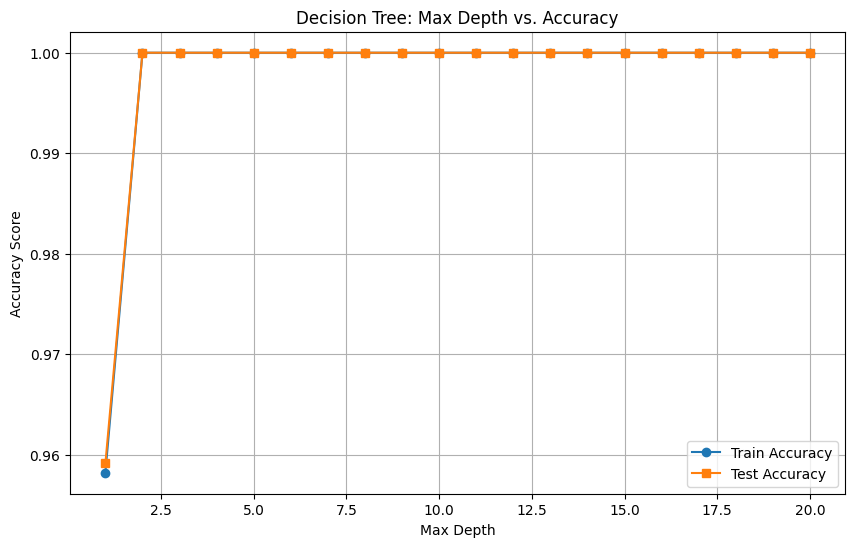

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Test different max_depth values
max_depths = range(1, 21)  # Trying depths from 1 to 20
train_accuracies = []
test_accuracies = []

for depth in max_depths:
    dt_model = DecisionTreeClassifier(criterion='entropy', max_depth=depth, random_state=42)
    dt_model.fit(X_train, y_train)

    # Compute accuracy
    train_acc = accuracy_score(y_train, dt_model.predict(X_train))
    test_acc = accuracy_score(y_test, dt_model.predict(X_test))

    train_accuracies.append(train_acc)
    test_accuracies.append(test_acc)

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(max_depths, train_accuracies, label='Train Accuracy', marker='o')
plt.plot(max_depths, test_accuracies, label='Test Accuracy', marker='s')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy Score')
plt.title('Decision Tree: Max Depth vs. Accuracy')
plt.legend()
plt.grid(True)
plt.show()



In [8]:
# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X_tensor = torch.tensor(X, dtype=torch.float32)
y_tensor = torch.tensor(y, dtype=torch.float32).view(-1, 1)


In [9]:
# Define a simple feedforward ANN model
class ANNModel(nn.Module):
    def __init__(self, input_dim):
        super(ANNModel, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_dim, 16),
            nn.ReLU(),
            nn.Linear(16, 8),
            nn.ReLU(),
            nn.Linear(8, 1),
            nn.Sigmoid()
        )

    def forward(self, x):
        return self.network(x)


In [34]:
from sklearn.metrics import precision_score

# Cross-validation setup
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
accuracies = []
f1_scores = []
precisions = []

# Train and evaluate in each fold
for fold, (train_idx, val_idx) in enumerate(skf.split(X, y), 1):
    X_train, X_val = X_tensor[train_idx], X_tensor[val_idx]
    y_train, y_val = y_tensor[train_idx], y_tensor[val_idx]

    train_ds = TensorDataset(X_train, y_train)
    train_loader = DataLoader(train_ds, batch_size=32, shuffle=True)

    model = ANNModel(X.shape[1])
    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    # Training loop
    for epoch in range(50):
        model.train()
        for xb, yb in train_loader:
            preds = model(xb)
            loss = criterion(preds, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()


    model.eval()
    with torch.no_grad():
        y_pred = model(X_val).round().numpy()
        acc = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        precision = precision_score(y_val, y_pred)

        accuracies.append(acc)
        f1_scores.append(f1)
        precisions.append(precision)

        print(f"Fold {fold}: Accuracy = {acc:.4f}, F1 Score = {f1:.4f}, Precision = {precision:.4f}")


Fold 1: Accuracy = 0.9969, F1 Score = 0.9954, Precision = 0.9985
Fold 2: Accuracy = 0.9974, F1 Score = 0.9962, Precision = 0.9970
Fold 3: Accuracy = 0.9984, F1 Score = 0.9977, Precision = 0.9985
Fold 4: Accuracy = 0.9953, F1 Score = 0.9932, Precision = 0.9894
Fold 5: Accuracy = 0.9932, F1 Score = 0.9900, Precision = 0.9984


In [35]:
# Show average metrics
print("\n=== Cross-Validation Summary ===")
print(f"Average Accuracy: {np.mean(accuracies):.4f}")
print(f"Average F1 Score: {np.mean(f1_scores):.4f}")
print(f"Average Precision: {np.mean(precisions):.4f}")



=== Cross-Validation Summary ===
Average Accuracy: 0.9962
Average F1 Score: 0.9945
Average Precision: 0.9964


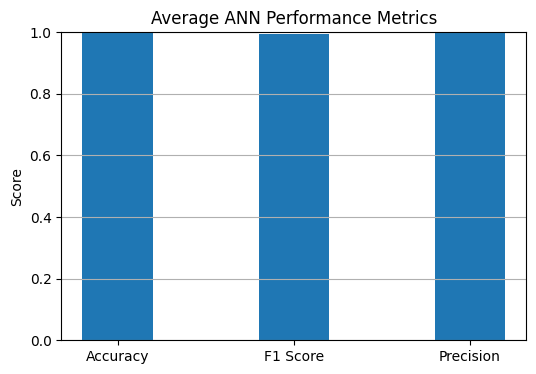

In [36]:
# Bar chart for average scores
avg_scores = {
    "Accuracy": np.mean(accuracies),
    "F1 Score": np.mean(f1_scores),
    "Precision": np.mean(precisions)
}

plt.figure(figsize=(6, 4))
plt.bar(avg_scores.keys(), avg_scores.values(), width=0.4)
plt.ylim(0, 1)
plt.title("Average ANN Performance Metrics")
plt.ylabel("Score")
plt.grid(axis='y')
plt.show()
